# Logistic Regression 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("data/38_feature.csv",index_col=0)
data_norm = pd.read_csv("data/38_feature_norm.csv",index_col=0)
data_std_scale = pd.read_csv("data/38_feature_std_scale.csv",index_col=0)

X = data.iloc[:,2:]
y2 = data['class2']
y4 = data['class4']
X_norm = data_norm.iloc[:,2:]
X_std_scale = data_std_scale.iloc[:,2:]

In [2]:
def LR_tuning(X_train, y_train , penalty_list = ['l2']):
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import RepeatedStratifiedKFold
    from sklearn.model_selection import GridSearchCV

    # define models and parameters
    model = LogisticRegression(max_iter=1000)
    solvers = ['newton-cg', 'lbfgs', 'liblinear','sag','saga']
    penalty = penalty_list
    c_values = [120 ,80, 20 ,0.01]

    # define grid search
    grid = dict(solver=solvers,penalty=penalty,C=c_values)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=12)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(X_train, y_train)

    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

    params = pd.DataFrame(grid_result.cv_results_['params'])
    params['CV_test_score'] = grid_result.cv_results_['mean_test_score']
    return (params)


## 2-class classification

In [6]:
# define dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y2, stratify = y2,test_size=0.20, random_state=42)

In [8]:
params_l2 = LR_tuning(X_train = X_train, y_train = y_train, penalty_list = ['l2'])

Best: 0.859810 using {'C': 20, 'penalty': 'l2', 'solver': 'liblinear'}


In [10]:
from sklearn.linear_model import LogisticRegression
clf =LogisticRegression(C=20,penalty='l2',solver='liblinear',random_state=1,max_iter=1000).fit(X_train, y_train)

from sklearn.metrics import accuracy_score
accuracy_score(clf.predict(X_test),y_test)

0.8586956521739131

#### TEST PCA

In [20]:
PCA_2 = pd.read_csv('data/PCA_2_components_train.csv')
PCA_2_X = PCA_2.iloc[:,3:]
PCA_2_X

PCA_5 = pd.read_csv('data/PCA_5_components_train.csv')
PCA_5_X = PCA_5.iloc[:,3:]
PCA_5_X

PCA_10 = pd.read_csv('data/PCA_10_components_train.csv')
PCA_10_X = PCA_10.iloc[:,3:]
PCA_10_X
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    PCA_10_X, y2, stratify = y2,test_size=0.20, random_state=42)

LR_tuning(X_train = X_train, y_train = y_train, penalty_list = ['l2'])

Best: 0.836937 using {'C': 120, 'penalty': 'l2', 'solver': 'newton-cg'}


,C,penalty,solver,CV_test_score
0,120.00,l2,newton-cg,0.836937
1,120.00,l2,lbfgs,0.836937
2,120.00,l2,liblinear,0.836937
3,120.00,l2,sag,0.834234
4,120.00,l2,saga,0.832407
5,80.00,l2,newton-cg,0.836937
6,80.00,l2,lbfgs,0.836937
7,80.00,l2,liblinear,0.836937
8,80.00,l2,sag,0.834234
9,80.00,l2,saga,0.832407


Text(0.5, 1.0, "CV accuracy of Logistic Regression with different solver and C-value\npenalty = 'l2'")

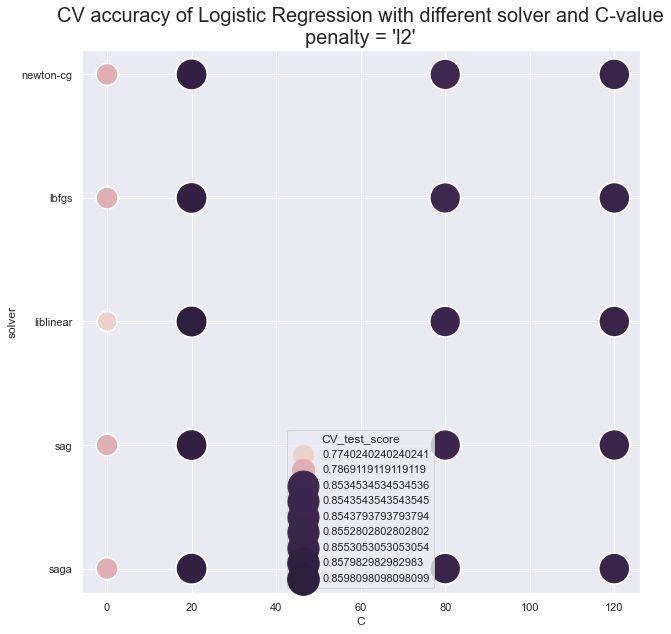

In [134]:
f = plt.figure(figsize=(10, 10))
sns.set(style = "darkgrid")
f = sns.scatterplot(
    data=params_l2, x="C", y="solver", hue="CV_test_score", size="CV_test_score",
    sizes=(400, 1000), legend="full"
)
f.axes.set_title("CV accuracy of Logistic Regression with different solver and C-value\npenalty = 'l2'",fontsize=20)


In [125]:
# define models and parameters
model = LogisticRegression(max_iter=1000)
solvers = ['liblinear','saga']
penalty = ['l1']
c_values = [120 ,80, 20 ,0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
params_l1 = pd.DataFrame(grid_result.cv_results_['params'])
params_l1['CV_test_score'] = grid_result.cv_results_['mean_test_score']
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.860711 using {'C': 20, 'penalty': 'l1', 'solver': 'liblinear'}


In [126]:
clf =LogisticRegression(C=20,penalty='l1',solver='liblinear',random_state=1,max_iter=1000).fit(X_train, y_train)

from sklearn.metrics import accuracy_score
accuracy_score(clf.predict(X_test),y_test)

0.8478260869565217

In [135]:
params = pd.concat([params_l1,params_l2])

fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, projection = '3d')

x = params['C']
y = params['solver']
z = params['penalty']

import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(params, x='C', y='solver', z='penalty',
              color='CV_test_score')
fig.update_layout(
    title={
        'text': "CV accuracy of Logistic Regression with different solver, C-value and penalty",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
# fig.title="CV accuracy of Logistic Regression with different solver and C-value\npenalty = 'l2'"
fig.show()

<Figure size 720x720 with 0 Axes>

In [31]:

clf =LogisticRegression(C=0.01,penalty='l2',solver='newton-cg',random_state=12,max_iter=1000).fit(X_train, y_train)

from sklearn.metrics import accuracy_score
accuracy_score(clf.predict(X_test),y_test)

0.8369565217391305

 After tuning, we select X_norm dataset + {'C': 20, 'penalty': 'l2', 'solver': 'liblinear'} as the best hyperparameters. which has a 0.859810 on training CV test accuracy score, accuracy 0.8586956521739131 on test set.

## 4-class classification

In [160]:
X_train, X_test, y_train, y_test = train_test_split(
    X_std_scale, y4, stratify = y4,test_size=0.20, random_state=42)

In [153]:

# define models and parameters
model = LogisticRegression(max_iter=1000)
solvers = ['newton-cg', 'lbfgs', 'liblinear','sag','saga']
penalty = ['l2']
c_values = [120 ,80, 20 ,0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.630055 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}


In [155]:
clf =LogisticRegression(C=0.01,penalty='l2',solver='newton-cg',random_state=1,max_iter=1000).fit(X_train, y_train)

from sklearn.metrics import accuracy_score
accuracy_score(clf.predict(X_test),y_test)

0.6521739130434783

In [157]:
X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y4, stratify = y4,test_size=0.20, random_state=42)

In [158]:
# define models and parameters
model = LogisticRegression(max_iter=1000)
solvers = ['newton-cg', 'lbfgs', 'liblinear','sag','saga']
penalty = ['l2']
c_values = [120 ,80, 20 ,0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.630906 using {'C': 20, 'penalty': 'l2', 'solver': 'liblinear'}


In [159]:
clf =LogisticRegression(C=20,penalty='l2',solver='liblinear',random_state=1,max_iter=1000).fit(X_train, y_train)

from sklearn.metrics import accuracy_score
accuracy_score(clf.predict(X_test),y_test)

0.6739130434782609

X_norm + using {'C': 20, 'penalty': 'l2', 'solver': 'liblinear'}